In [1]:
import numpy as np
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
dataset = pd.read_csv('sms_data.csv')
data = dataset
dataset.head()

,observation_id,text,type
0,1,"Go until jurong point, crazy.. Available only ...",ham
1,2,Ok lar... Joking wif u oni...,ham
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,4,U dun say so early hor... U c already then say...,ham
4,5,"Nah I don't think he goes to usf, he lives aro...",ham


Cleaning the data

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [4]:
#removing punctuation
data['text'] = data['text'].str.replace('[^\w\s]','')
# Removing stopwords
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords.words('english')))
data.head()

,observation_id,text,type
0,1,Go jurong point crazy Available bugis n great ...,ham
1,2,Ok lar Joking wif u oni,ham
2,3,Free entry 2 wkly comp win FA Cup final tkts 2...,spam
3,4,U dun say early hor U c already say,ham
4,5,Nah I dont think goes usf lives around though,ham


In [5]:
# converting the lables to numeric value
data['type'] = data.type.map({'ham':0,'spam':1})
data.head()

,observation_id,text,type
0,1,Go jurong point crazy Available bugis n great ...,0
1,2,Ok lar Joking wif u oni,0
2,3,Free entry 2 wkly comp win FA Cup final tkts 2...,1
3,4,U dun say early hor U c already say,0
4,5,Nah I dont think goes usf lives around though,0


In [6]:
# only interested in text and type
data = data.drop(['observation_id'],axis=1)
data.head()

,text,type
0,Go jurong point crazy Available bugis n great ...,0
1,Ok lar Joking wif u oni,0
2,Free entry 2 wkly comp win FA Cup final tkts 2...,1
3,U dun say early hor U c already say,0
4,Nah I dont think goes usf lives around though,0


In [7]:
# Visualization
import matplotlib.pyplot as plt

In [8]:
# get the type destribution 
print(data.type.value_counts())

0    4827
1     747
Name: type, dtype: int64


In [9]:
print(data.describe())

              type
count  5574.000000
mean      0.134015
std       0.340699
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


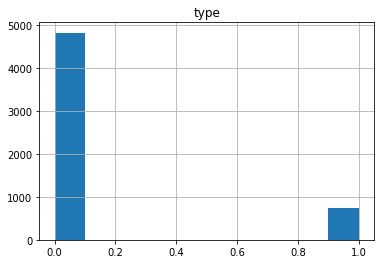

In [10]:
data.hist()
plt.show()

In [11]:
# Spliting the dataset
from sklearn.model_selection import train_test_split

In [12]:
X = data.text
y = data.type

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=1)

In [13]:
# vectorizing the text
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train = vect.fit_transform(X_train)

Let the fun begin.

In [14]:
import keras
from keras.layers import Dense, Activation,LSTM, Embedding
from keras.models import Sequential

Using TensorFlow backend.


In [15]:
model = Sequential([
    Embedding(20000, 128,input_length = x_train.shape[1]),
    LSTM(200),
    Activation('relu'),
    Dense(2),
    Activation('sigmoid'),
])

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

In [16]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 7685, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               263200    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 2,823,602
Trainable params: 2,823,602
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train, keras.utils.to_categorical(y_train), epochs=40, batch_size=50)

Epoch 1/40
3901/3901 [==============================] - 1124s 288ms/step - loss: 0.4151 - acc: 0.8608
Epoch 2/40
3901/3901 [==============================] - 1105s 283ms/step - loss: 0.3969 - acc: 0.8654
Epoch 3/40
3901/3901 [==============================] - 1115s 286ms/step - loss: 0.3976 - acc: 0.8654
Epoch 4/40
  50/3901 [..............................] - ETA: 18:29 - loss: 0.3674 - acc: 0.8800

In [ ]:
# keras.utils.to_categorical(y_train, num_classes=2)

In [82]:
model.evaluate(vect.fit_transform(X_test), keras.utils.to_categorical(y_test), batch_size=10)

ValueError: Error when checking input: expected dense_12_input to have shape (7676,) but got array with shape (4818,)

In [189]:
x_train[2].shape

(1, 7676)

In [190]:
x_train.shape

(3901, 7676)